The following program works on the understanding that Intensity falls off from the central line track following a Gaussian curve. We can assume the standard deviation=1 and then consider pixels within 3 standard deviations to be signals. 

Or, we can classify the pixels as signals which fall within the Full Width at Half Maximum (FWHM). The FWHM lies at 2.355*standard deviations from the peak.

In [712]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas
import math
import random
import cv2
import sklearn
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### 1. By simply computing the distance of pixels from the line

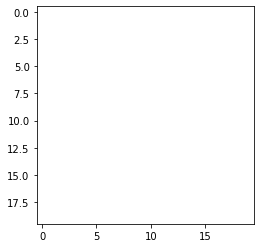

In [153]:
pixel = mpimg.imread(r"\Users\Kaustav Dutta\Desktop\test.png");
plt.imshow(pixel)
plt.show()

In [154]:
pixel.shape

(20, 20, 3)

The equation of line taken is y=x-3

In [328]:
sqrt=math.sqrt
pi=math.pi
alpha=-0.785398
sigma=1
ybar=10
xbar=10

In [329]:
for i in range(0,20):
    for j in range(0,20):
        dist= abs((j+i-10)/sqrt(2))
        if(dist>3*sigma):
            pixel[j][i]=(0,0,255)
        elif((dist>2*sigma)and(dist<=3*sigma)):
            pixel[i][j]=(255,140,0)
        elif((dist>sigma)and(dist<=2*sigma)):
            pixel[i][j]=(218,165,32)
        elif((dist>=0)and(dist<=sigma)):
            pixel[i][j]=(255,255,0)

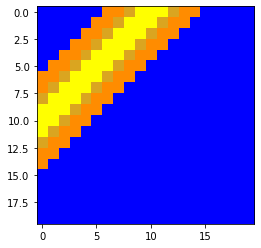

In [330]:
plt.imshow(pixel.astype('uint8'))
plt.show()

### 2. Computing the Gaussian Integral

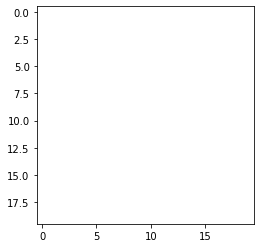

In [189]:
pixel = mpimg.imread(r"\Users\Kaustav Dutta\Desktop\test.png");
plt.imshow(pixel)
plt.show()

In [461]:
pixel.shape

(20, 20, 3)

In [325]:
sqrt=math.sqrt
pi=math.pi
alpha=-0.785398
sigma=1
ybar=10
xbar=10
exp=math.exp
cos=math.cos
sin=math.sin

In [326]:
for i in range(0,20):
    for j in range(0,20):
        intensity=(1/(sqrt(2*pi*(sigma)**2)))*exp(-((((j-ybar))*cos(alpha))-(((i-xbar))*sin(alpha)))**2/(2*(sigma)**2))
        pixel[i][j]=(intensity*2.5,intensity*2.5,0)

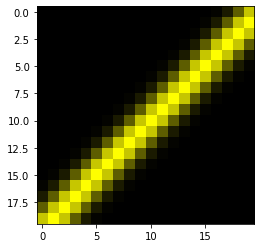

In [327]:
plt.imshow(pixel)
plt.show()

### 3. Finding out the Standard Deviation

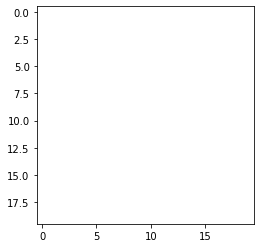

In [331]:
pixel = mpimg.imread(r"\Users\Kaustav Dutta\Desktop\test.png");
plt.imshow(pixel)
plt.show()

In [369]:
sqrt=math.sqrt
pi=math.pi
alpha=0.785398
sigma=4
ybar=10
xbar=10
exp=math.exp
cos=math.cos
sin=math.sin
I0=255

In [373]:
for i in range(0,20):
    for j in range(0,20):
        intensity=I0*exp(-((((j-ybar))*cos(alpha))-(((i-xbar))*sin(alpha)))**2/(2*(sigma)**2))
        if(intensity>=I0/4):
            pixel[i,j]=(intensity,intensity,0)
        else:
            pixel[i][j]=(0,0,0)

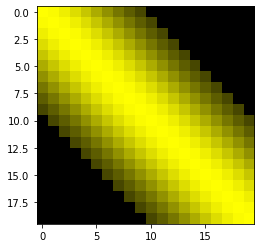

In [374]:
plt.imshow(pixel/255)
plt.show()

In [497]:
irand=np.random.randint(0,20,np.random.randint(1,10))

[0.09390409 0.38729677 0.37464791 0.44268571 0.38475704 0.41493926
 0.47748507 0.23260308 0.10565614 0.03665721]


In [677]:
y=np.array([])
for i in range(0,200):
    if i<=100:
        y=np.append(y,1)
    else:
        y=np.append(y,0)

In [689]:
len(y)

200

We'll now be generating images with line and some noise...

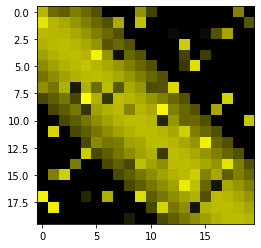

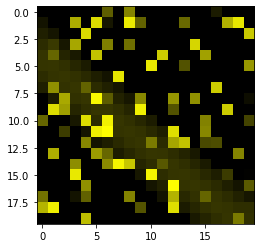

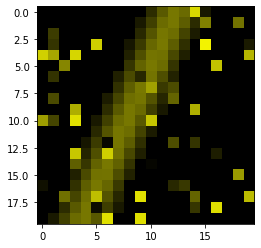

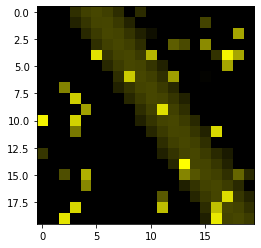

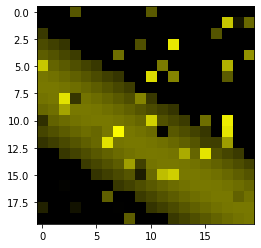

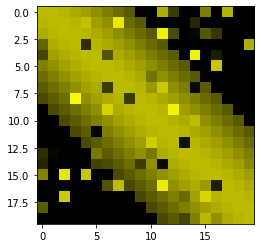

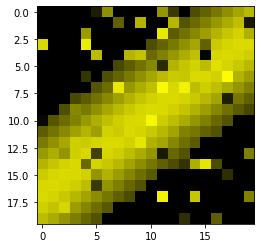

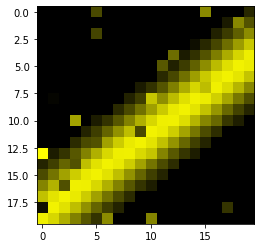

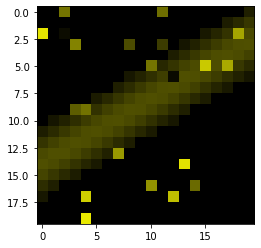

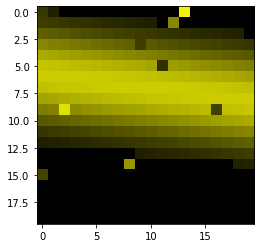

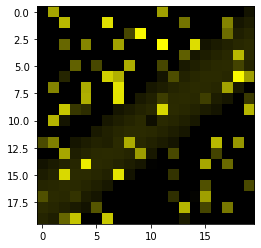

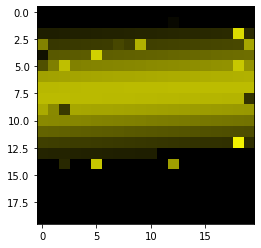

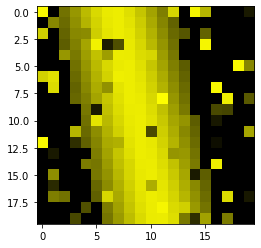

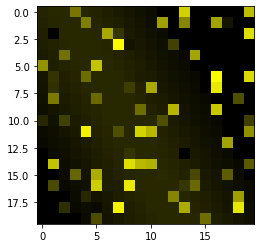

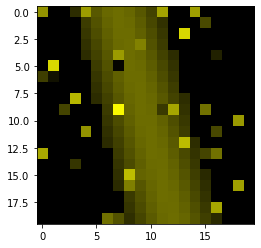

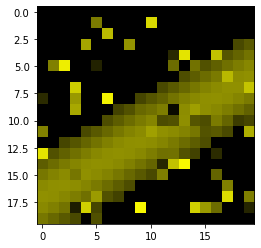

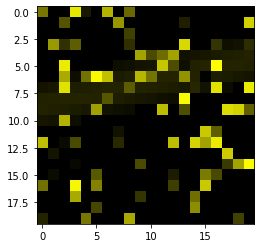

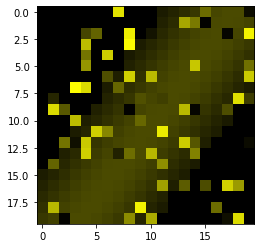

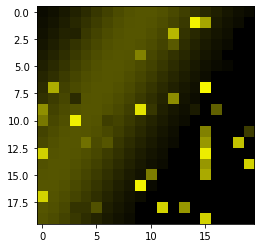

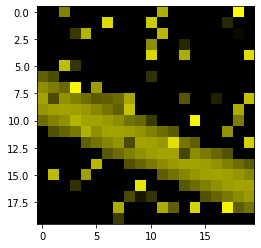

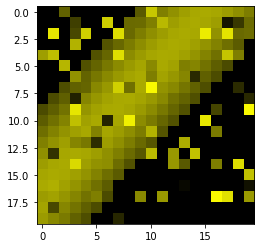

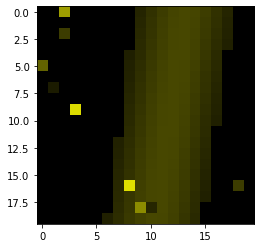

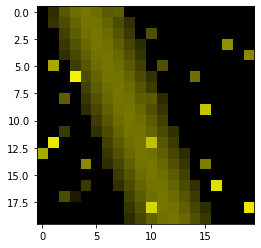

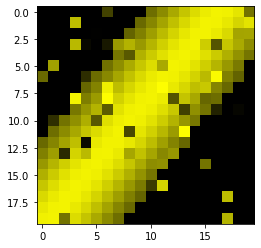

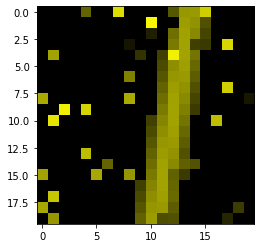

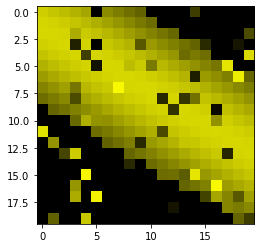

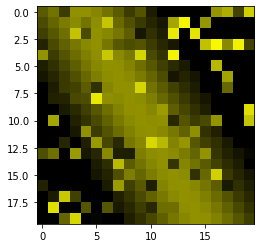

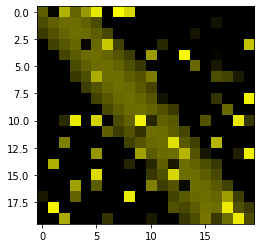

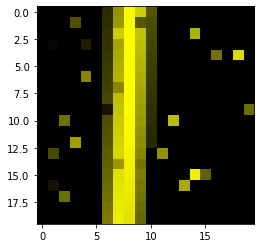

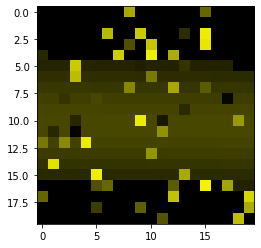

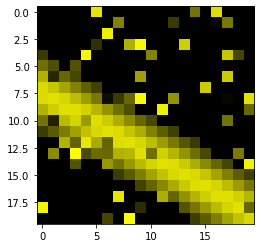

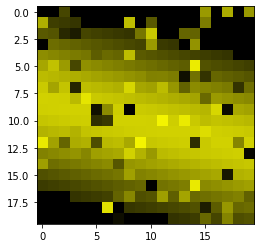

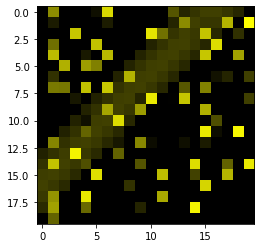

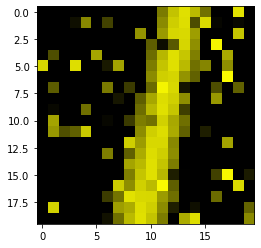

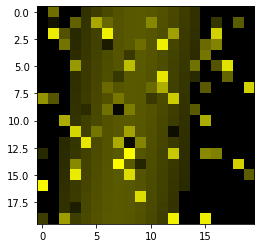

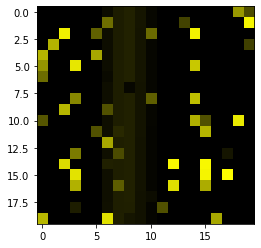

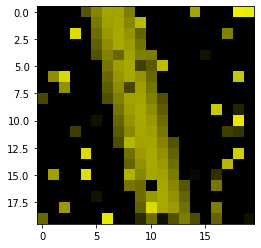

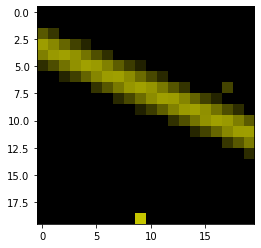

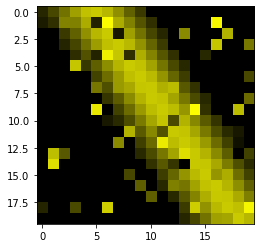

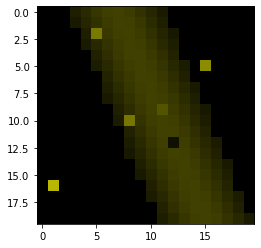

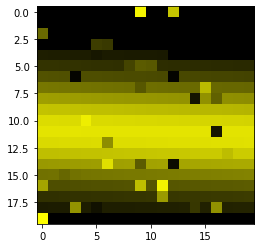

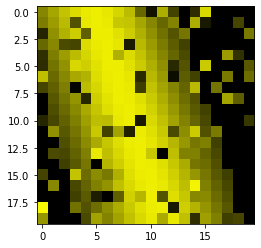

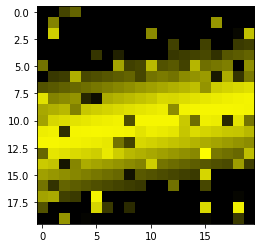

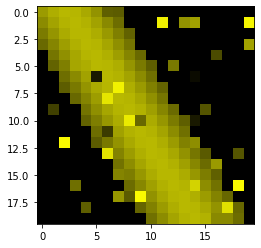

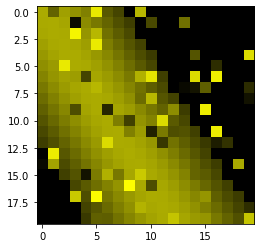

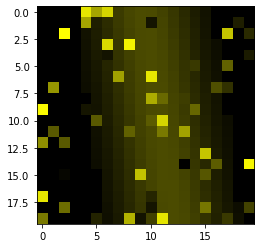

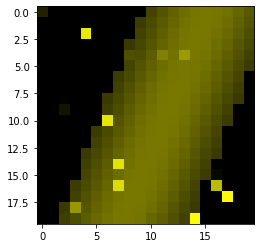

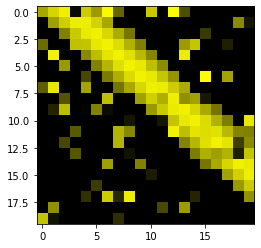

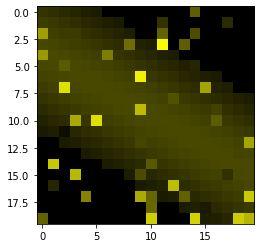

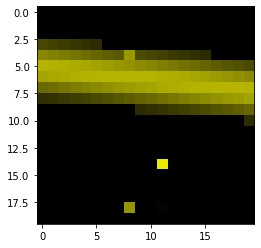

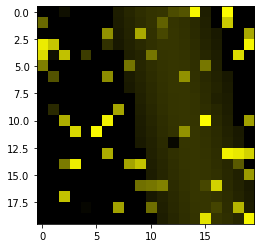

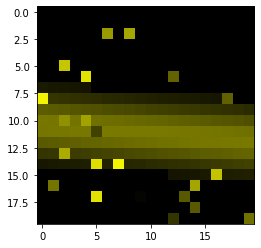

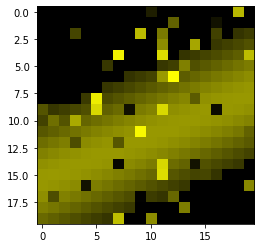

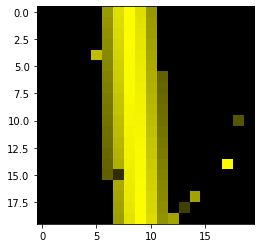

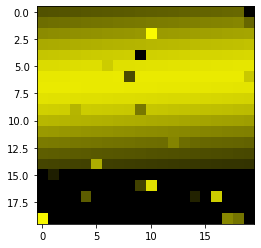

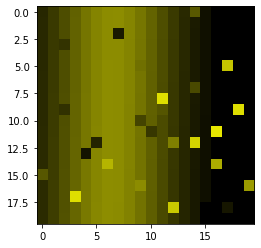

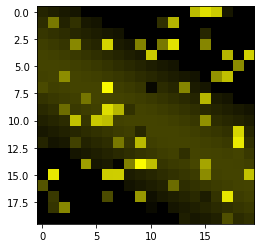

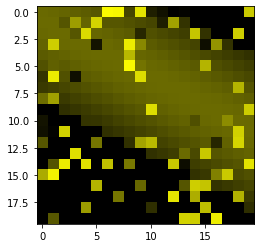

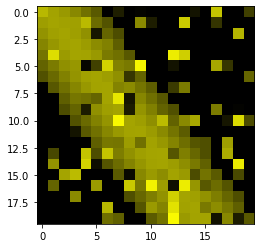

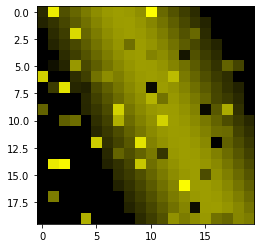

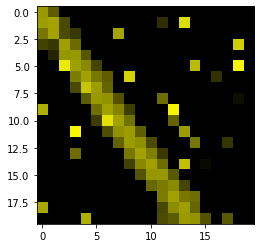

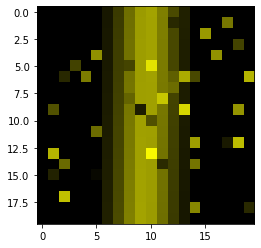

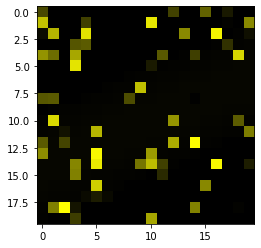

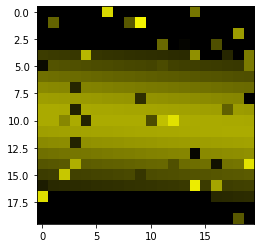

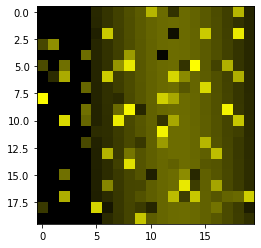

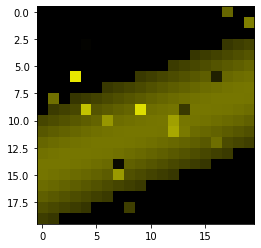

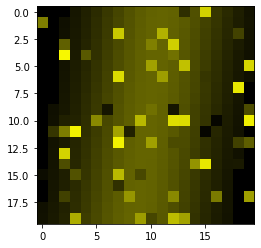

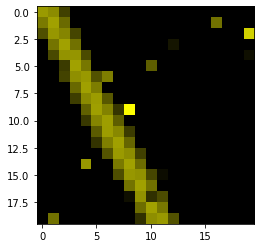

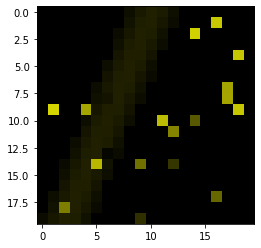

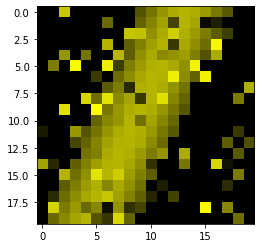

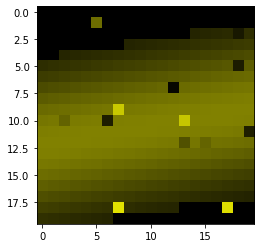

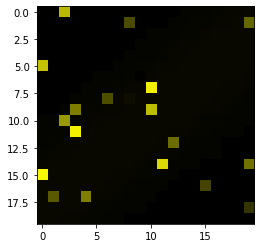

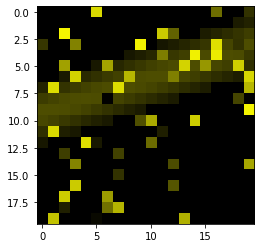

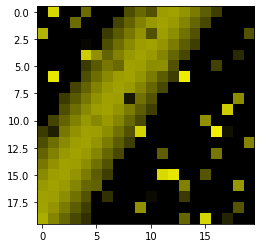

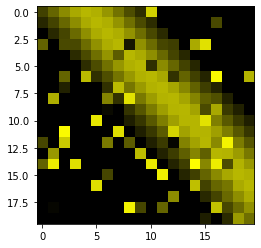

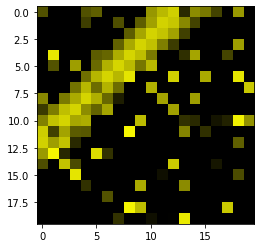

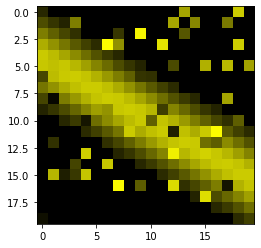

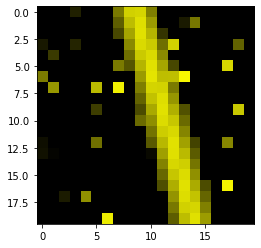

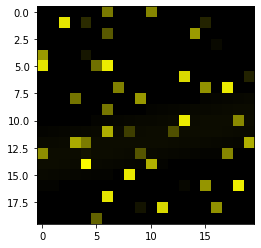

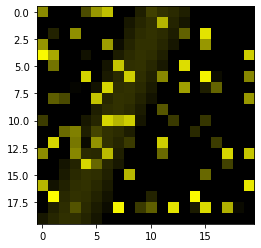

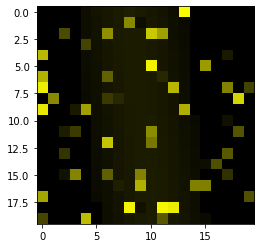

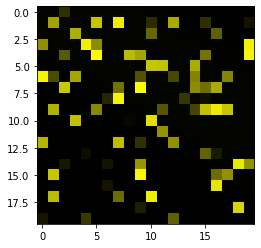

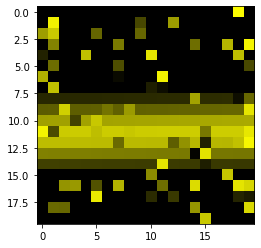

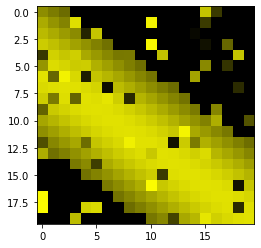

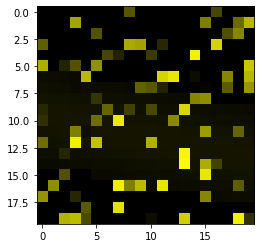

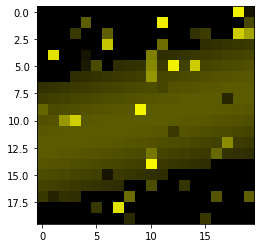

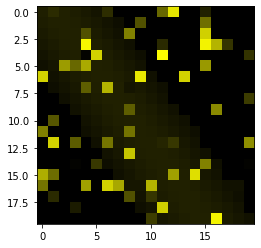

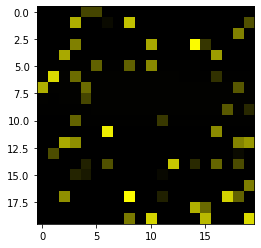

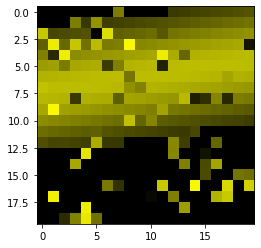

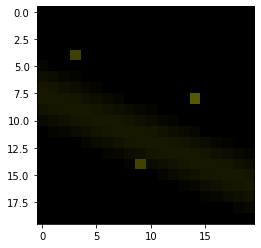

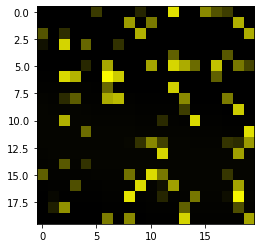

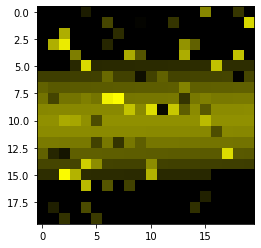

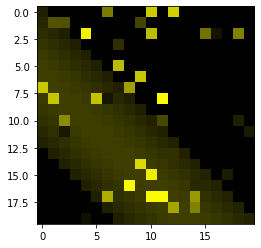

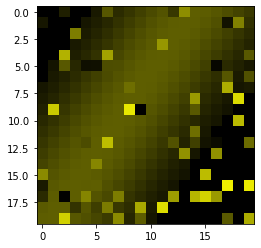

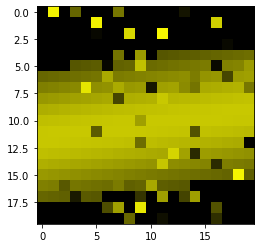

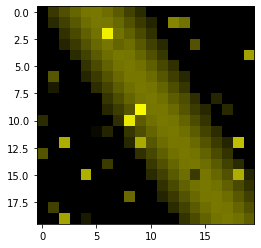

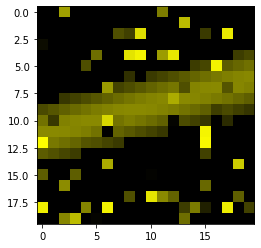

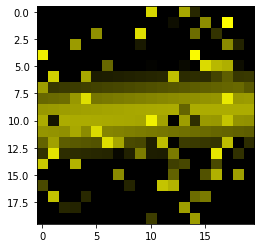

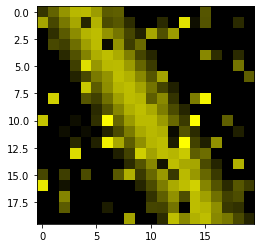

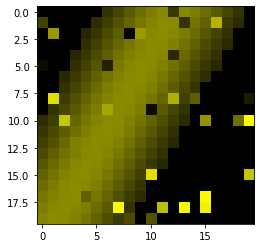

100


In [718]:
X=[]  #Set of images with a line
for k in range(100):
    I0=np.random.randint(1,255)
    alpha=np.random.uniform(0,pi)
    xbar=np.random.uniform(5,12.5)
    ybar=np.random.uniform(5,12.5)
    sigma=np.random.uniform(1,5)
    f=np.random.uniform(0.1,0.5)
    for i in range(0,20):
        for j in range(0,20):
            intensity=I0*exp(-((((j-ybar))*cos(alpha))-(((i-xbar))*sin(alpha)))**2/(2*(sigma)**2))
            if(intensity>=f*I0):
                pixel[i,j]=(intensity/255,intensity/255,0)
            else:
                pixel[i,j]=(0,0,0)
   
  #Adding noise...
    for l in range(np.random.randint(1,100)):
        irand=np.random.randint(0,20)
        jrand=np.random.randint(0,20)
        noise=np.random.uniform(0,1)
        pixel[irand,jrand]=(noise,noise,0)
    
    #print(irand,jrand)
    
    plt.imshow(pixel)
    plt.show()
    
   
    X.append(pixel.flatten())
    
print(len(X))    
    #x[k]=pixel.flatten()

Next, we shall generate images with only noise....

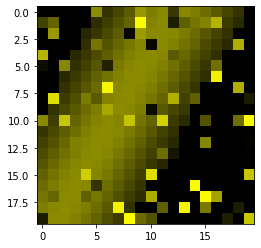

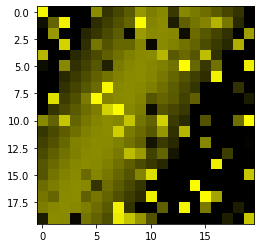

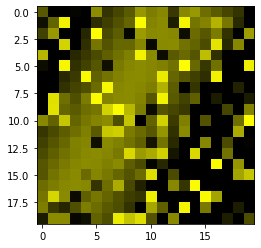

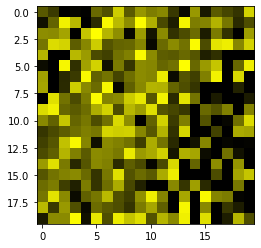

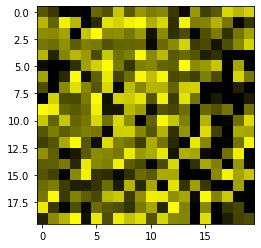

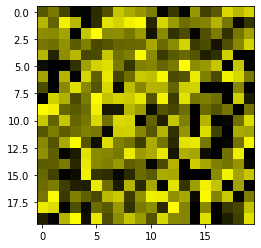

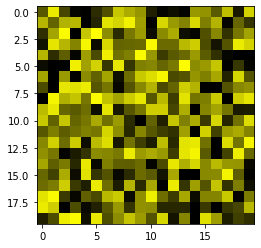

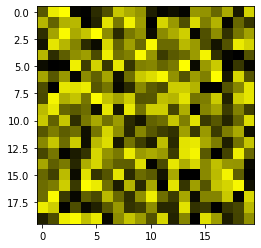

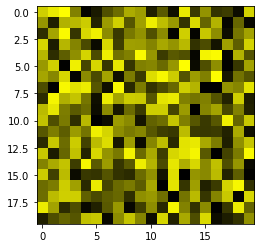

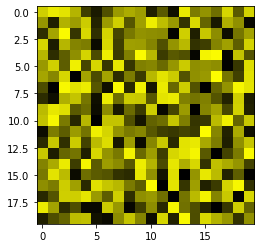

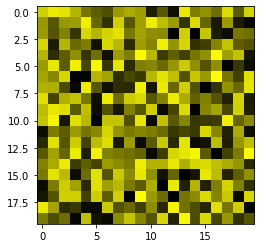

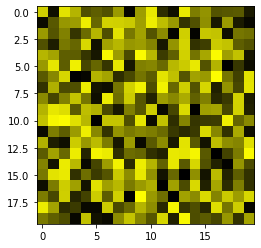

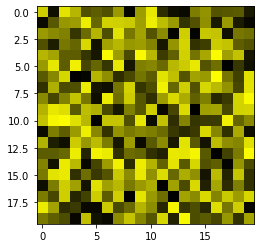

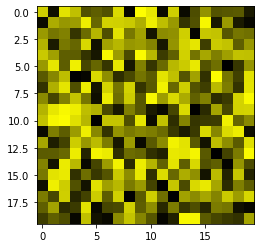

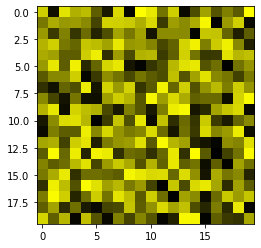

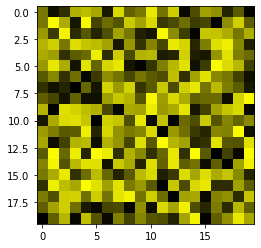

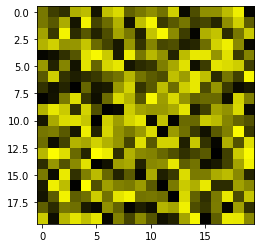

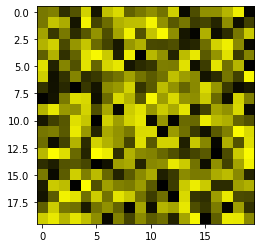

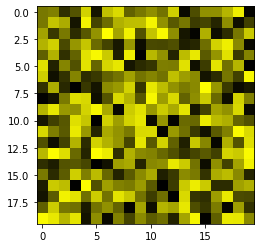

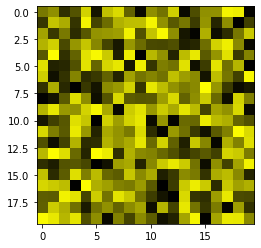

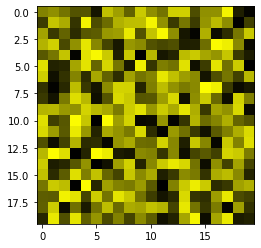

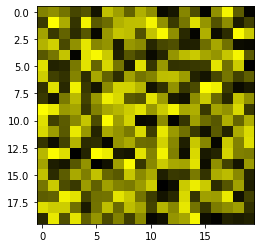

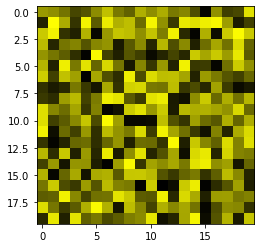

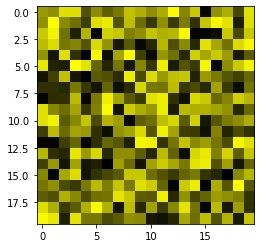

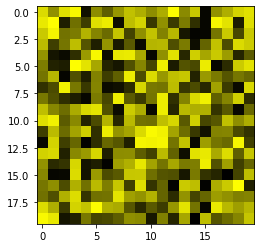

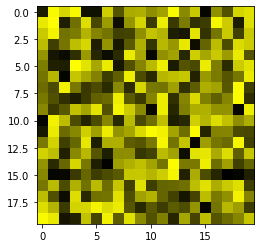

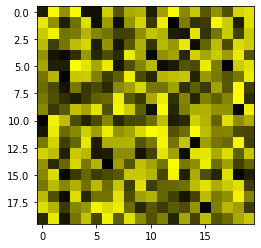

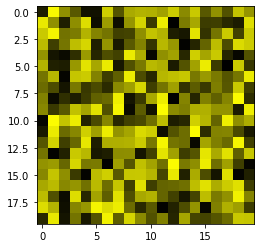

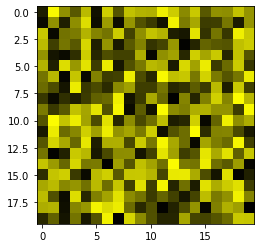

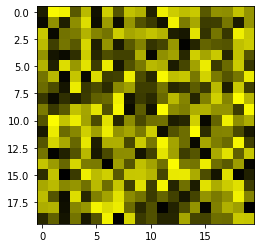

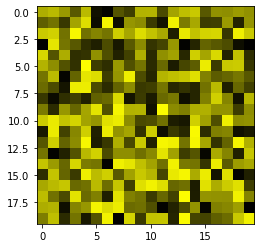

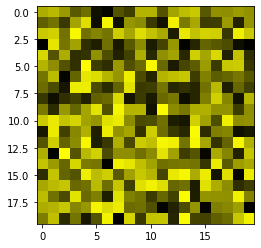

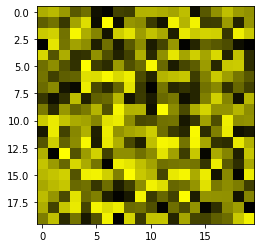

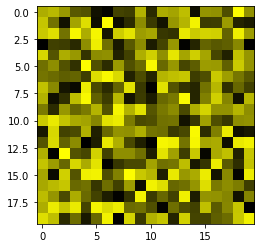

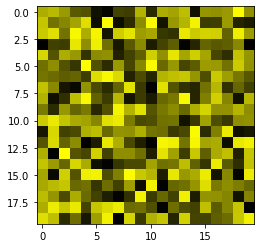

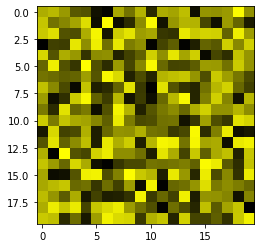

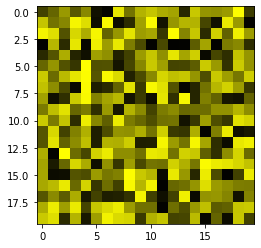

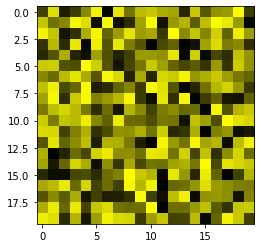

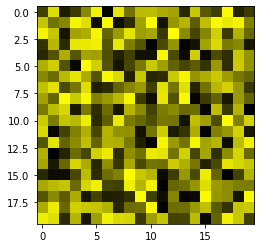

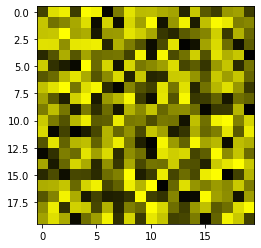

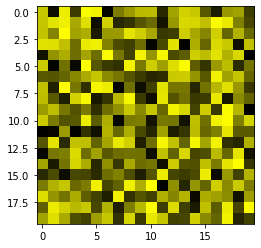

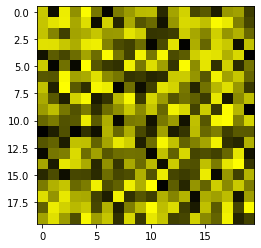

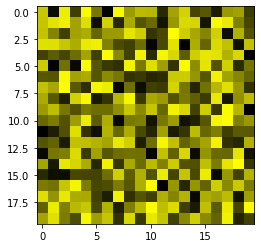

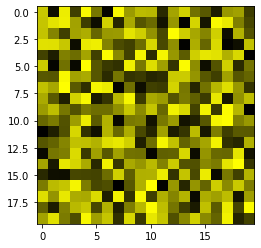

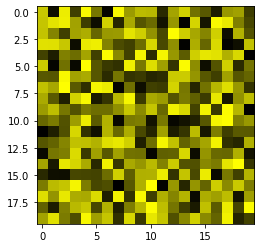

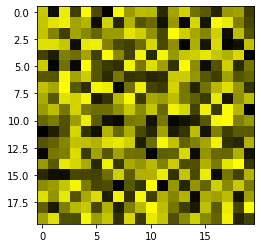

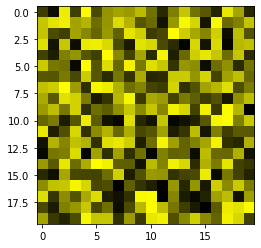

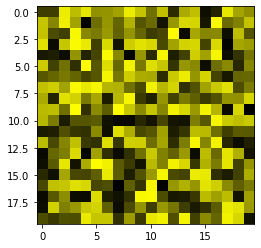

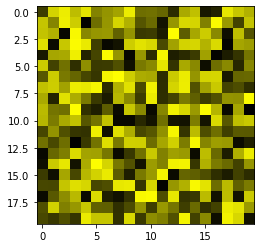

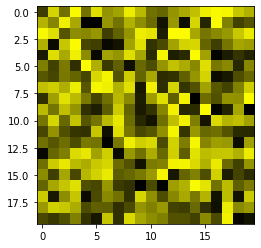

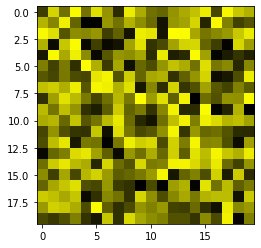

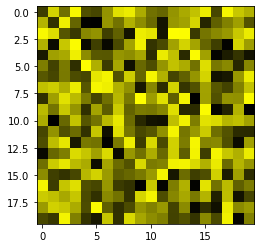

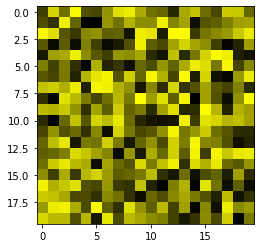

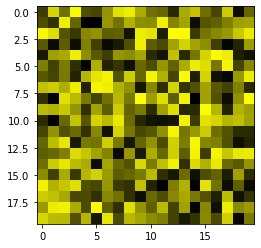

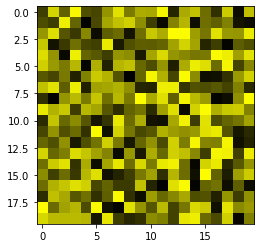

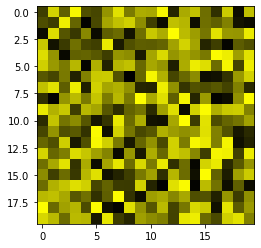

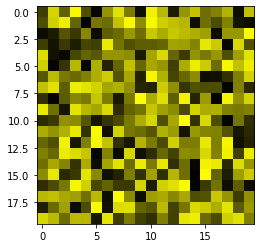

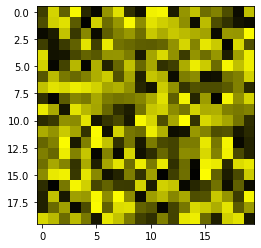

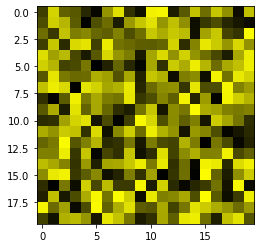

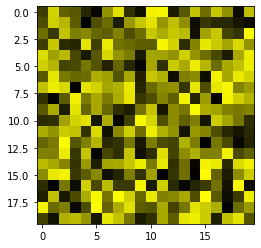

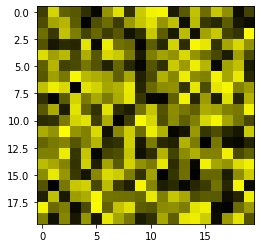

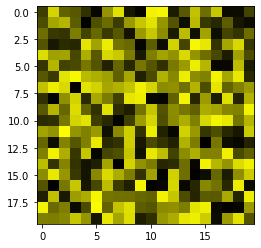

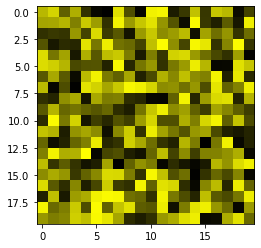

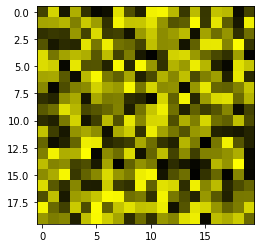

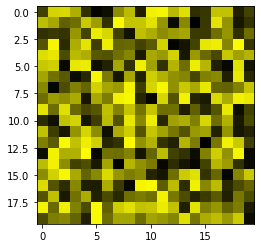

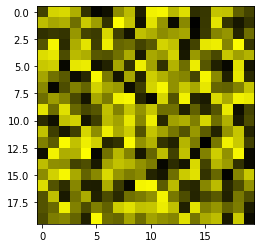

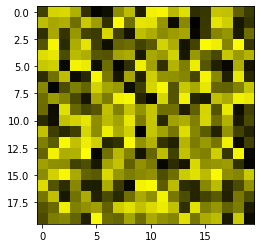

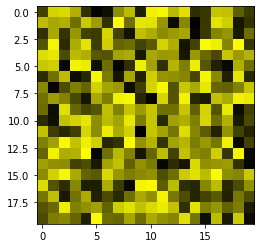

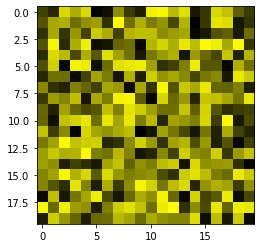

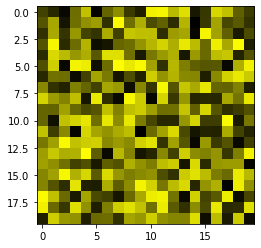

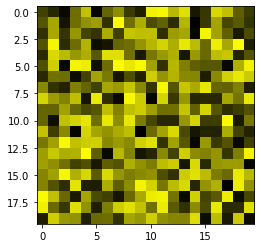

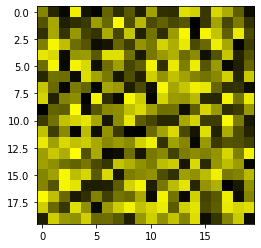

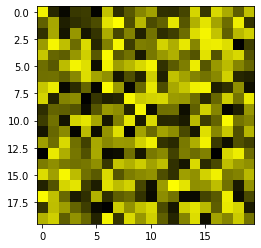

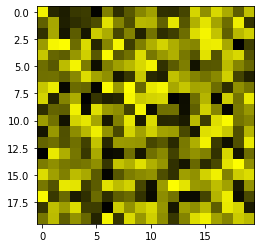

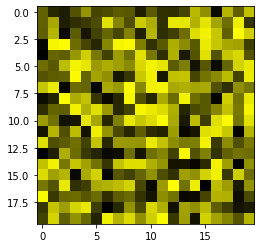

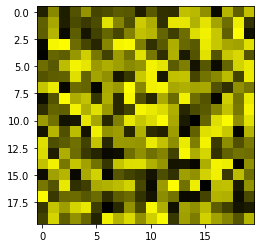

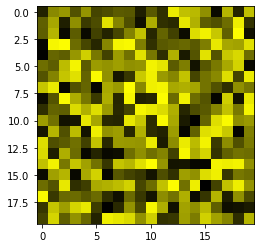

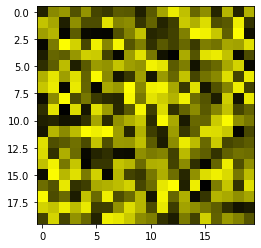

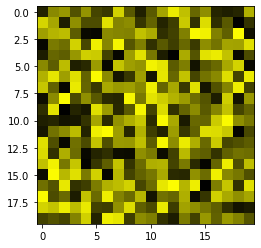

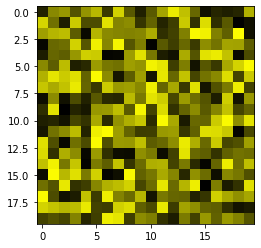

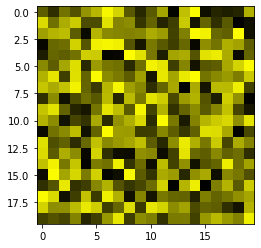

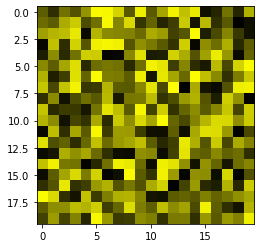

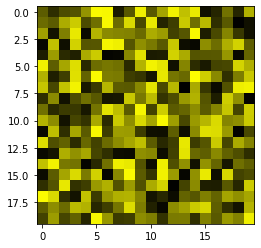

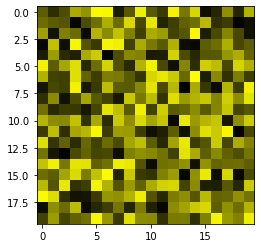

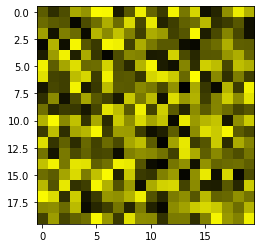

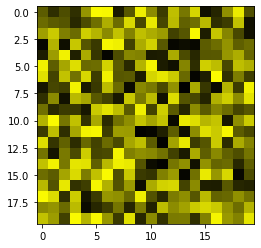

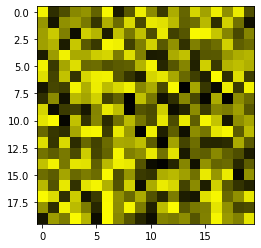

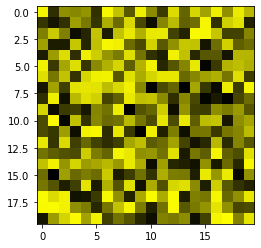

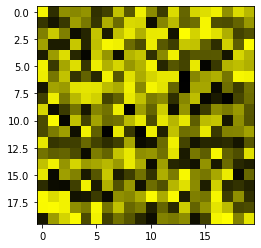

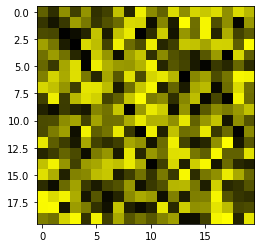

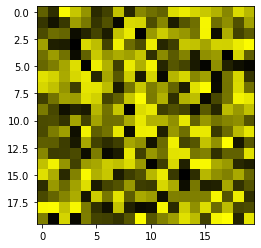

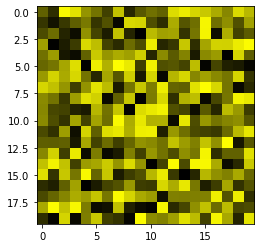

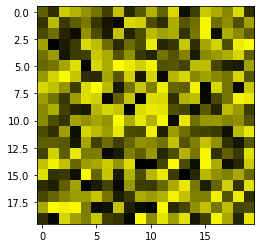

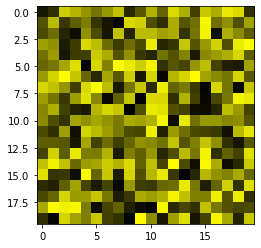

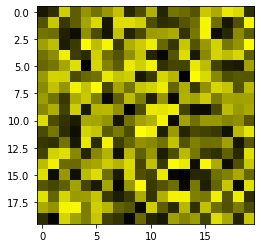

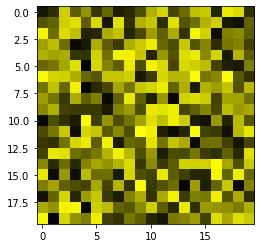

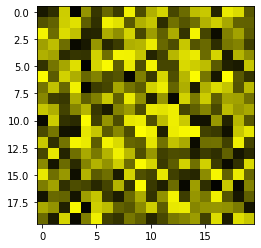

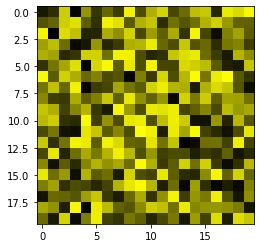

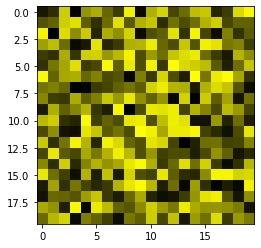

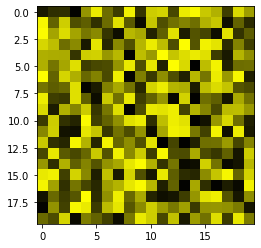

In [719]:
#noline=[]
for k in range(100):
    #Adding noise...
    for l in range(np.random.randint(1,240)):
        irand=np.random.randint(0,20)
        jrand=np.random.randint(0,20)
        noise=np.random.uniform(0,1)
        pixel[irand,jrand]=(noise,noise,0)
    
   #print(irand,jrand)
    
    plt.imshow(pixel)
    plt.show()
    #noline.append(pixel.flatten())
    X.append(pixel.flatten()) 
    #x.append(noline)

In [667]:
len(X)

200

We'll now move forward with training the algorithm with the training dataset and then testing it using different Machine Learning algorithms..

#### a. Logistic Regression

In [684]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
logreg = LogisticRegression()   
probas_ = logreg.fit(X_train, y_train).predict_proba(X_test)

In [702]:
y_test.sum()

29.0

In [701]:
y_pred.sum()

25.0

In [687]:
y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [691]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.968750


In [693]:
thresholds

array([2., 1., 0.])

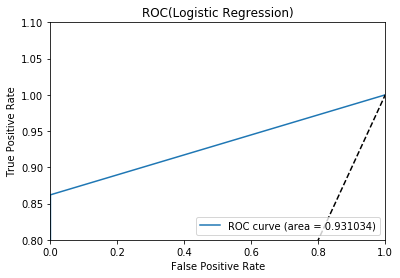

In [700]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.8, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

#### b. Decision Tree

In [694]:
clf = DecisionTreeClassifier()

In [695]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
probas_ = clf.fit(X_train, y_train).predict_proba(X_test)

In [696]:
y_pred= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [697]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.931034


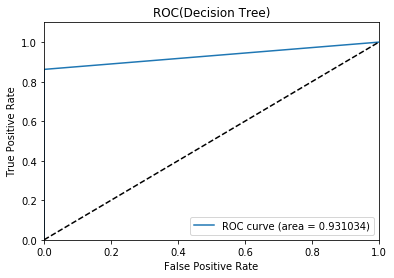

In [698]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(Decision Tree)')
plt.legend(loc="lower right")
plt.show()

#### c. Support Vector Machine

In [703]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0) 
classifier = svm.SVC(kernel='linear',probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

In [704]:
y_pred= classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98125


In [705]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.981481


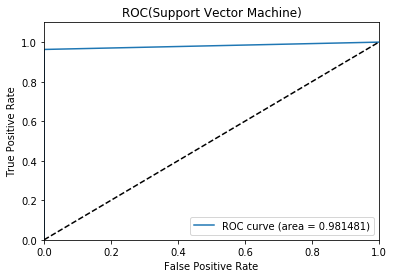

In [706]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(Support Vector Machine)')
plt.legend(loc="lower right")
plt.show()

#### d. KNN Classifier 

In [708]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.8, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7) 
probas_=knn.fit(X_train, y_train).predict_proba(X_test)

In [709]:
y_pred= knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99375


In [710]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.993976


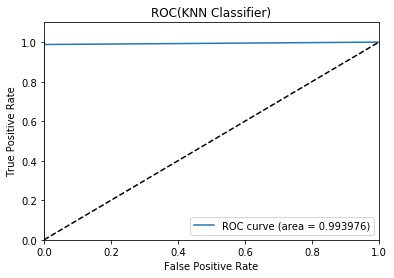

In [711]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(KNN Classifier)')
plt.legend(loc="lower right")
plt.show()

#### e. Gaussian Naive Bayes Classifier

In [713]:
gnb = GaussianNB()

In [714]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.8, random_state=42)
probas_=gnb.fit(X_train, y_train).predict_proba(X_test)

In [715]:
y_pred= gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [716]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.951807


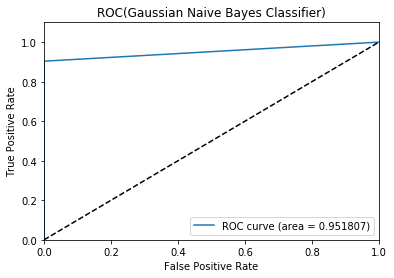

In [717]:
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC(Gaussian Naive Bayes Classifier)')
plt.legend(loc="lower right")
plt.show()

In [721]:
dataset=pandas.read_csv(r"\Users\Kaustav Dutta\Desktop\Accuracy.csv")  
dataset.head(5)

,Classifier,Accuracy,AUROC
0,Decision Tree,0.9333,0.931034
1,Support Vector Machine,0.9813,0.981481
2,K-Nearest Neighbors,0.9938,0.993976
3,Logistic Regression,0.9667,0.968750
4,Gaussian Naive Bayes,0.9500,0.951807


### 4. Working with noise

In [347]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [352]:
image = cv2.imread(r"\Users\Kaustav Dutta\Desktop\Line.png",0) # Only for grayscale image
noise_img = sp_noise(image,0.1)
cv2.imwrite('sp_noise.jpg', noise_img)

True

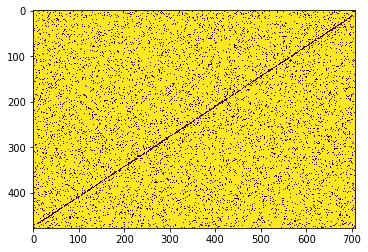

In [354]:
plt.imshow(noise_img)
plt.show()